# Notebook de EDA — Datathon (Esqueleto)

Este notebook contém um *esqueleto* de Análise Exploratória de Dados (EDA) para o **Datathon 2024**.

**Objetivo:**
- Prever o risco de **Defasagem Escolar** (`Defas`).

**Dicionário de Variáveis (Base 2024):**
- **Target:** `Defas` (Defasagem)
- **Indicadores Acadêmicos:** `INDE 22`, `IPS`, `IEG`, `IDA`, `IPV`, `IAA`, `IAN`
- **Dados Demográficos/Escolares:** `Fase`, `Turma`, `Ano ingresso`, `Instituição de ensino`, `Pedra 22`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import os

# matplotlib inline para notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# Comentários linha a linha:
# - pandas: leitura e manipulação de dados
# - numpy: operações numéricas
# - matplotlib: geração de gráficos (usado em ambiente offline)
# - scatter_matrix: matriz de dispersão para análise rápida


In [2]:
# Carregamento do dataset
DATA_PATH = '../data/BASE DE DADOS PEDE 2024 - DATATHON.xlsx'  # <<-- atualize para o caminho correto
try:
    df = pd.read_excel(DATA_PATH)
except Exception as e:
    print('Erro ao carregar arquivo:', e)
    df = pd.DataFrame()

# Exibir amostra e shape
display(df.head())
print('Shape:', df.shape)


,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,...,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


Shape: (860, 42)


In [3]:
# Filtragem de Colunas de Interesse
cols_interest = [
    'Defas',  
    'INDE 22', 'IPS', 'IEG', 'IDA', 'IPV', 'IAA', 'IAN',
    'Fase', 'Turma', 'Ano ingresso', 'Instituição de ensino', 'Pedra 22'
]

# Verificar quais colunas realmente existem no DF
cols_to_keep = [c for c in cols_interest if c in df.columns]
missing_cols = [c for c in cols_interest if c not in df.columns]

if len(missing_cols) > 0:
    print(f'Colunas não encontradas: {missing_cols}')

df = df[cols_to_keep].copy()

# Tipos, nulos e estatísticas descritivas
if df.shape[0] > 0:
    display(df.info())
    display(df.describe(include='all').T)
else:
    print('DataFrame vazio — carregue os dados e reexecute esta célula.')


<class 'pandas.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Defas                  860 non-null    int64  
 1   INDE 22                860 non-null    float64
 2   IPS                    860 non-null    float64
 3   IEG                    860 non-null    float64
 4   IDA                    860 non-null    float64
 5   IPV                    860 non-null    float64
 6   IAA                    860 non-null    float64
 7   IAN                    860 non-null    float64
 8   Fase                   860 non-null    int64  
 9   Turma                  860 non-null    str    
 10  Ano ingresso           860 non-null    int64  
 11  Instituição de ensino  860 non-null    str    
 12  Pedra 22               860 non-null    str    
dtypes: float64(7), int64(3), str(3)
memory usage: 87.5 KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Defas,860.0,NaN,NaN,NaN,-0.943023,0.845593,-5.0,-1.0,-1.0,0.0,2.0
INDE 22,860.0,NaN,NaN,NaN,7.036176,1.017773,3.032,6.4855,7.197,7.75125,9.442
IPS,860.0,NaN,NaN,NaN,6.905,1.070707,2.5,6.3,7.5,7.5,10.0
IEG,860.0,NaN,NaN,NaN,7.891163,1.63834,0.0,7.0,8.3,9.1,10.0
IDA,860.0,NaN,NaN,NaN,6.092907,2.046209,0.0,4.8,6.3,7.6,9.9
IPV,860.0,NaN,NaN,NaN,7.253642,1.093383,2.5,6.722,7.333,7.917,10.0
IAA,860.0,NaN,NaN,NaN,8.274419,2.064935,0.0,7.9,8.8,9.5,10.0
IAN,860.0,NaN,NaN,NaN,6.424419,2.389609,2.5,5.0,5.0,10.0,10.0
Fase,860.0,NaN,NaN,NaN,2.098837,1.788789,0.0,1.0,2.0,3.0,7.0
Turma,860,24,A,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Novos nomes das colunas: ['DEFAS', 'INDE_22', 'IPS', 'IEG', 'IDA', 'IPV', 'IAA', 'IAN', 'FASE', 'TURMA', 'ANO_INGRESSO', 'INSTITUIÇÃO_DE_ENSINO', 'PEDRA_22']


DEFAS                    0.0
INDE_22                  0.0
IPS                      0.0
IEG                      0.0
IDA                      0.0
IPV                      0.0
IAA                      0.0
IAN                      0.0
FASE                     0.0
TURMA                    0.0
ANO_INGRESSO             0.0
INSTITUIÇÃO_DE_ENSINO    0.0
PEDRA_22                 0.0
dtype: float64

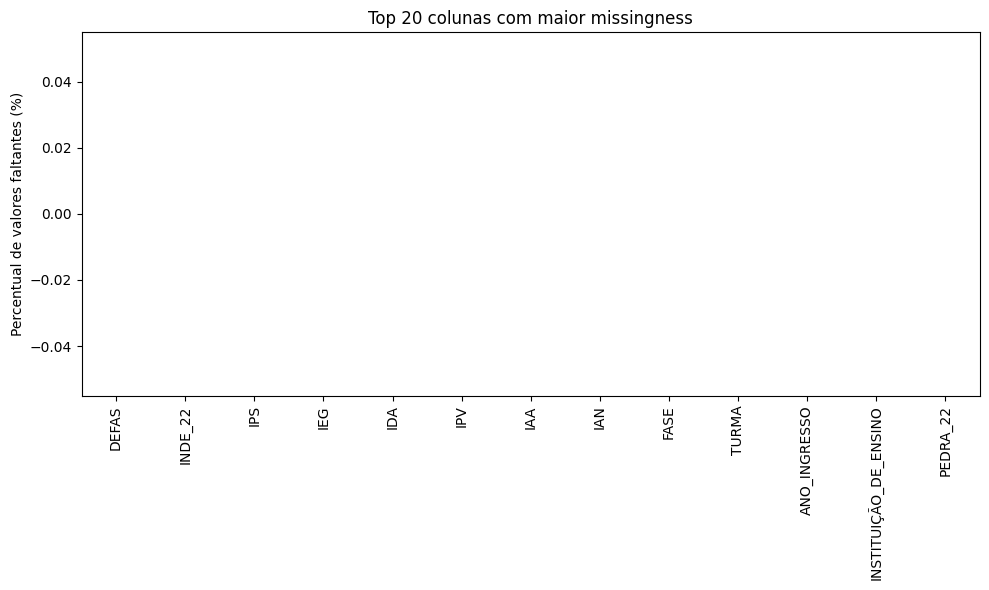

In [4]:
# Padronização dos Nomes das Colunas (snake_case)
if df.shape[0] > 0:
    # Converter para maiúsculas + substituir espaços por underline
    df.columns = [c.strip().upper().replace(' ', '_') for c in df.columns]
    
    print('Novos nomes das colunas:', df.columns.tolist())
    
    # Missingness: percentual por coluna
    missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
    display(missing_pct.head(50))
    top_miss = missing_pct.head(20)
    ax = top_miss.plot.bar()
    ax.set_ylabel('Percentual de valores faltantes (%)')
    ax.set_title('Top 20 colunas com maior missingness')
    plt.tight_layout()
else:
    print('DataFrame vazio — carregue os dados e reexecute esta célula.')


DEFAS
-5      1
-4      4
-3     23
-2    163
-1    410
 0    247
 1      9
 2      3
Name: count, dtype: int64

DEFAS
-5     0.12
-4     0.47
-3     2.67
-2    18.95
-1    47.67
 0    28.72
 1     1.05
 2     0.35
Name: count, dtype: float64

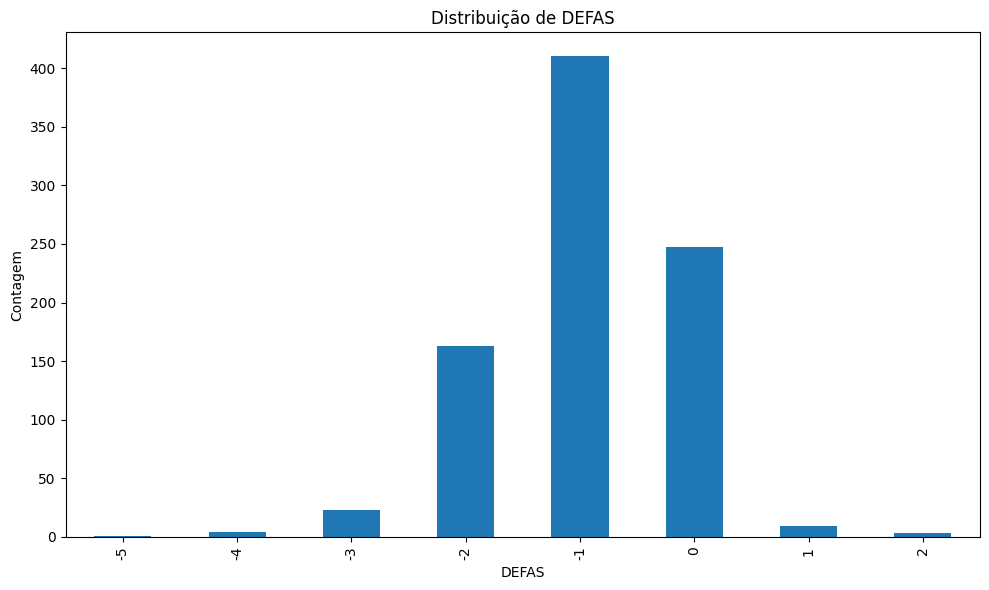

In [6]:
# Defina a coluna target e analise sua distribuição
TARGET_COL = 'DEFAS'  # <<-- Atualizado para nome padronizado
if TARGET_COL in df.columns:
    vc = df[TARGET_COL].value_counts(dropna=False).sort_index()
    display(vc)
    display((vc / len(df) * 100).round(2))
    vc.plot.bar(title=f'Distribuição de {TARGET_COL}')
    plt.ylabel('Contagem')
    plt.tight_layout()
else:
    print(f"Coluna target '{TARGET_COL}' não encontrada no DataFrame. Verifique o nome exato da coluna.")


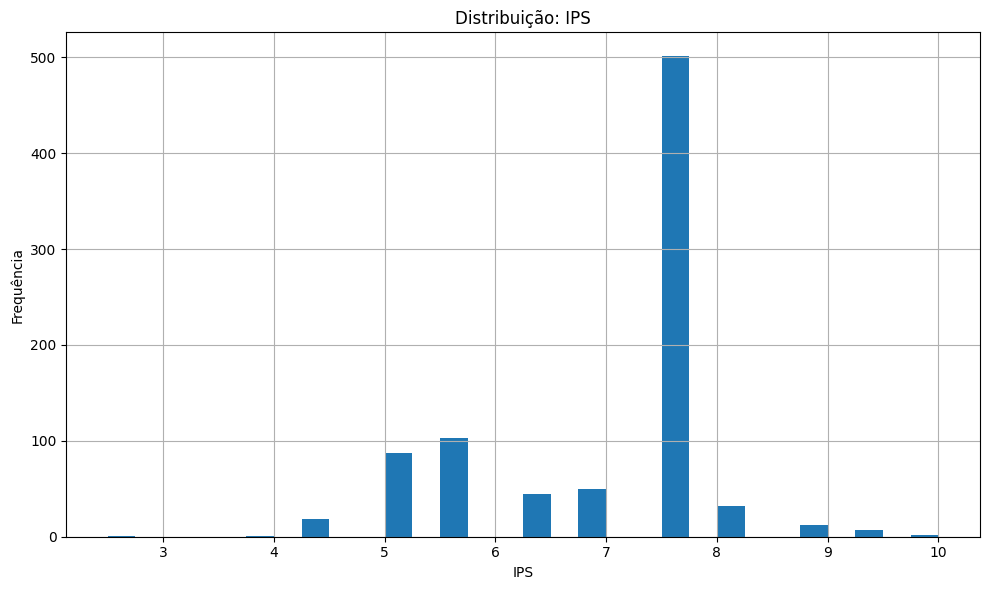

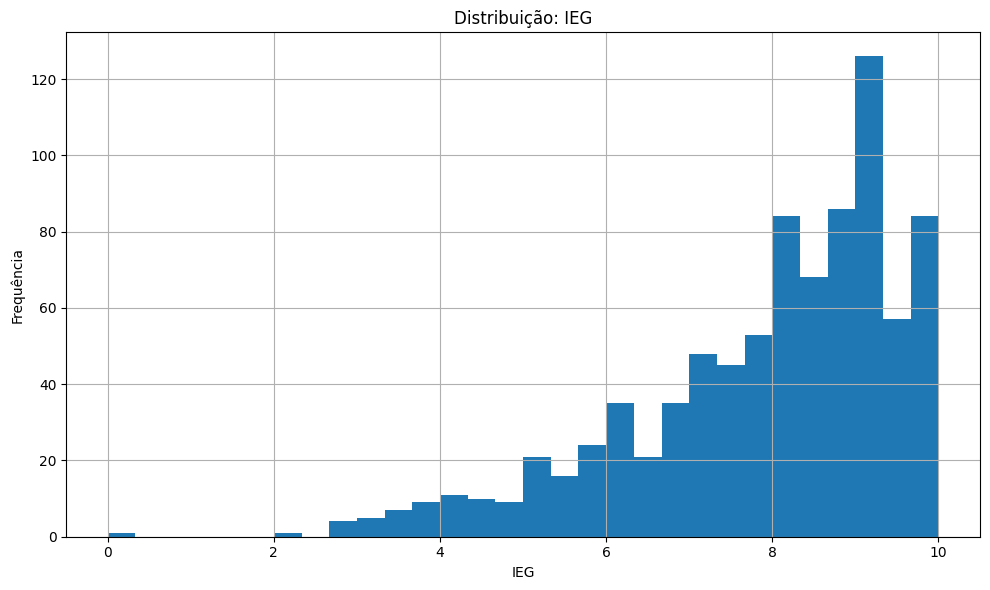

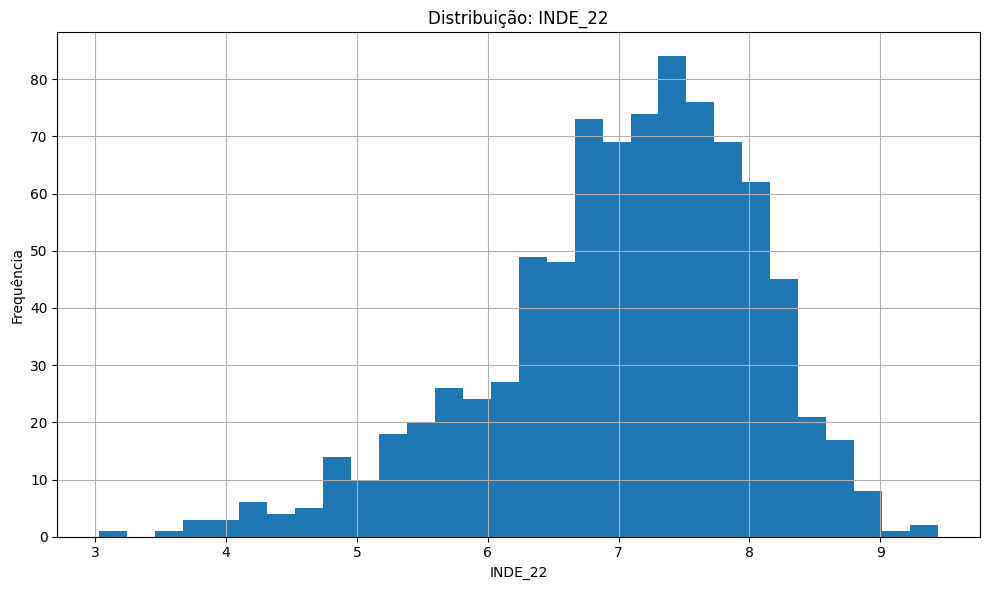

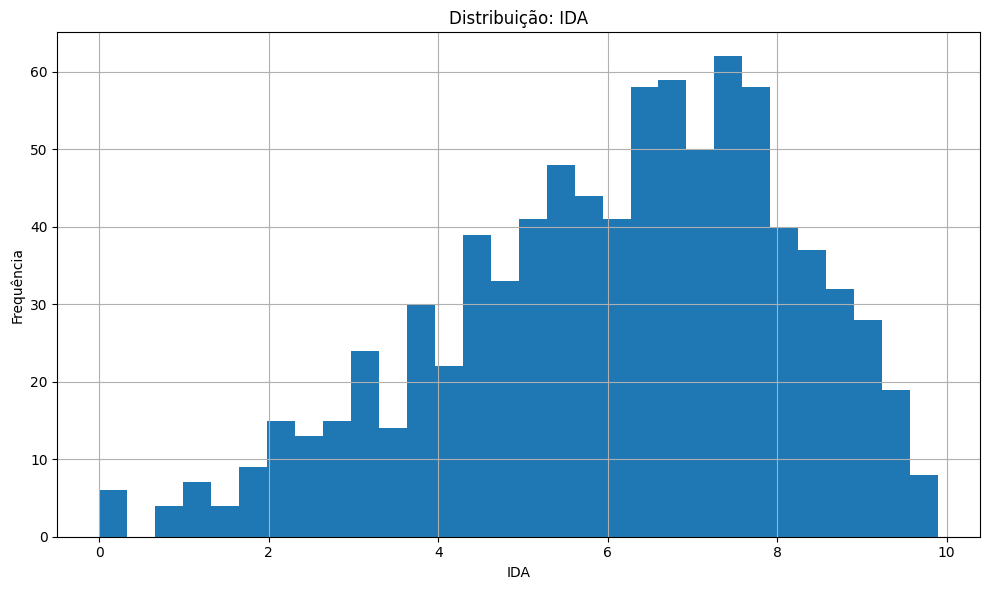

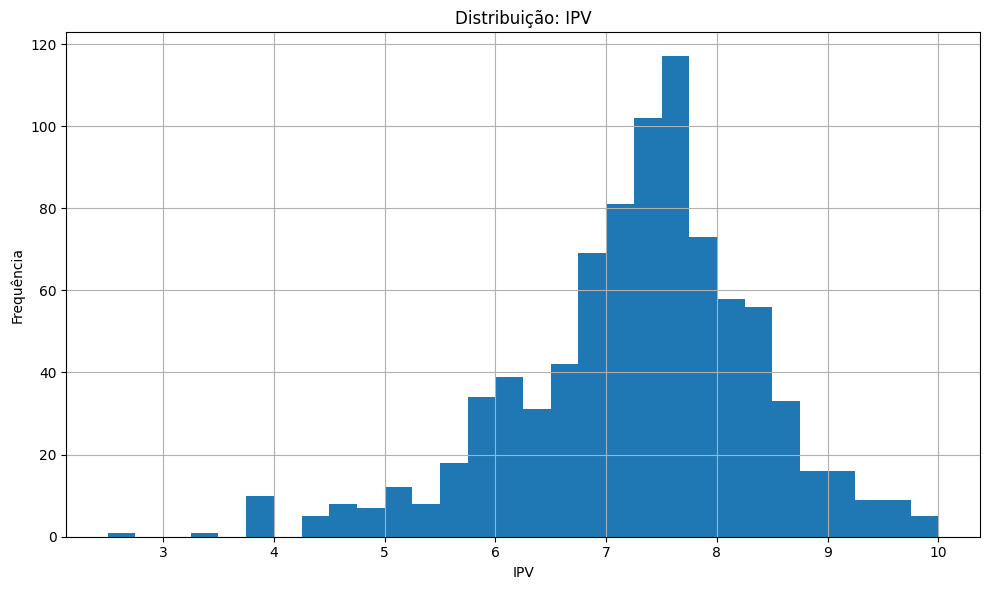

In [7]:
# Histogramas para variáveis numéricas principais
numeric_cols = ['IPS', 'IEG', 'INDE_22', 'IDA', 'IPV']
numeric_cols = [c for c in numeric_cols if c in df.columns]
if len(numeric_cols) == 0:
    print('Nenhuma das colunas numéricas de exemplo foi encontrada no DataFrame. Atualize a lista numeric_cols.')
else:
    for col in numeric_cols:
        plt.figure()
        df[col].hist(bins=30)
        plt.title(f'Distribuição: {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

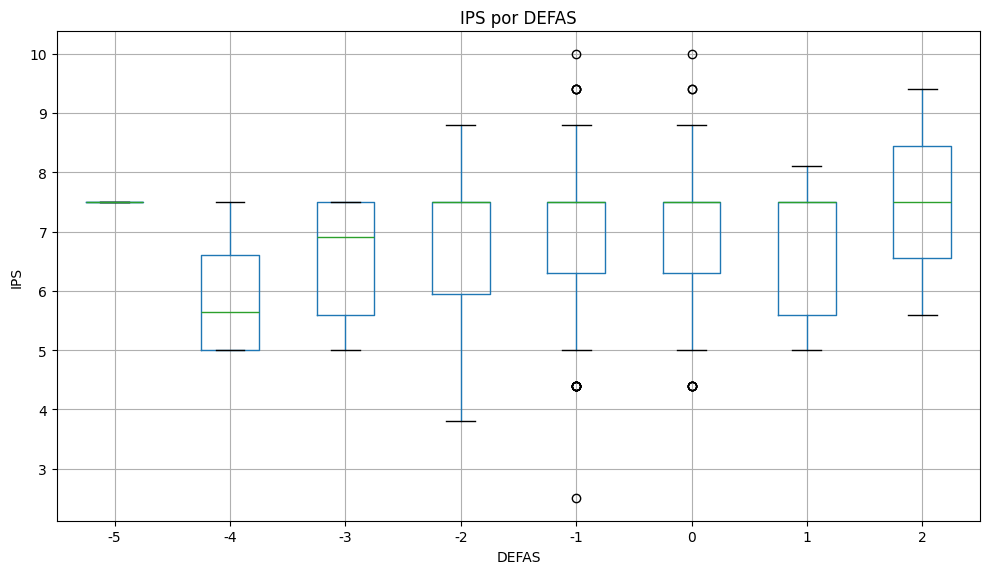

<Figure size 1000x600 with 0 Axes>

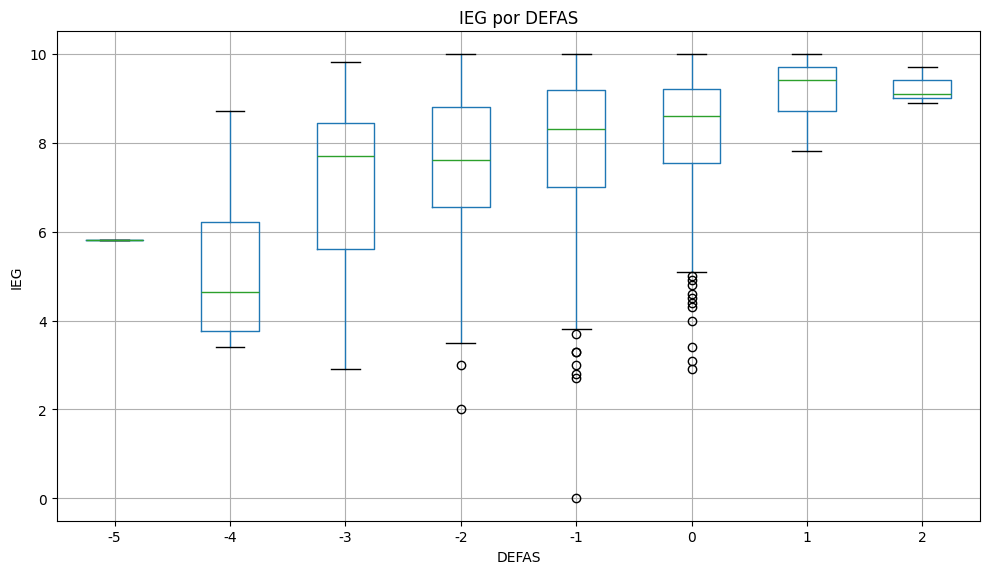

<Figure size 1000x600 with 0 Axes>

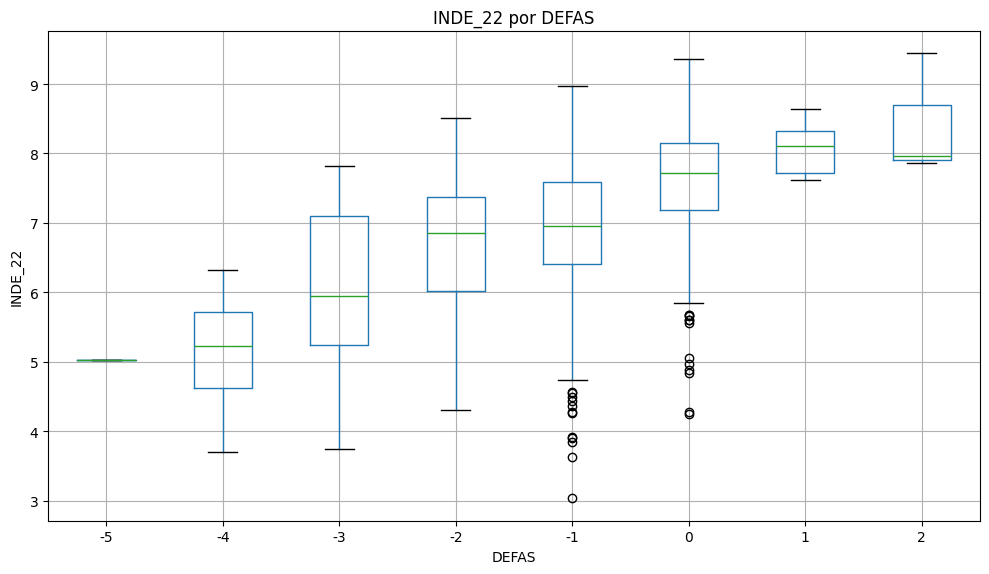

<Figure size 1000x600 with 0 Axes>

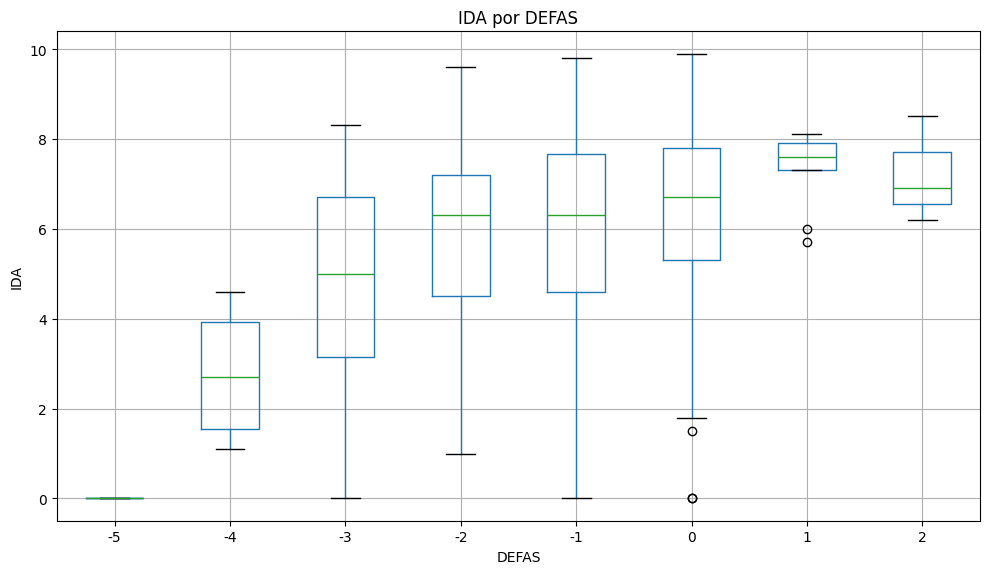

<Figure size 1000x600 with 0 Axes>

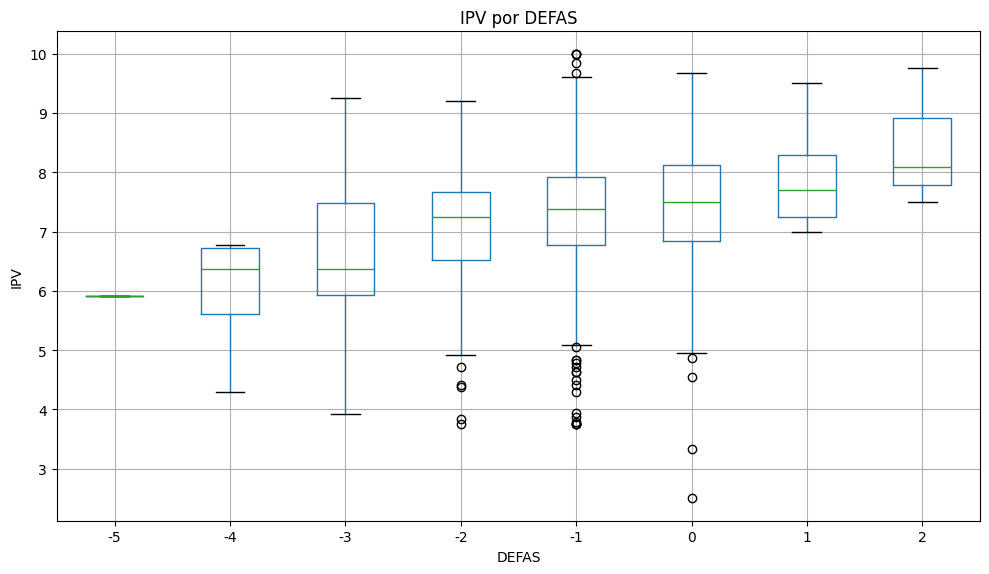

In [8]:
# Boxplots por classe do target
if TARGET_COL in df.columns and len(numeric_cols) > 0:
    for col in numeric_cols:
        plt.figure()
        df.boxplot(column=col, by=TARGET_COL)
        plt.title(f'{col} por {TARGET_COL}')
        plt.suptitle('')
        plt.xlabel(TARGET_COL)
        plt.ylabel(col)
        plt.tight_layout()
else:
    print('Não há target ou colunas numéricas definidas corretamente.')


,DEFAS,INDE_22,IPS,IEG,IDA,IPV,IAA,IAN,FASE,ANO_INGRESSO
DEFAS,1.000000,0.407384,0.059346,0.219770,0.181625,0.172869,0.032838,0.838383,0.019362,0.015127
INDE_22,0.407384,1.000000,0.269371,0.802061,0.817734,0.789104,0.455175,0.395443,-0.182274,0.069275
IPS,0.059346,0.269371,1.000000,0.093220,0.131926,0.208391,0.111015,0.034068,-0.070158,0.253421
IEG,0.219770,0.802061,0.093220,1.000000,0.564137,0.589178,0.323420,0.162230,-0.231208,0.106720
IDA,0.181625,0.817734,0.131926,0.564137,1.000000,0.616620,0.208855,0.145633,-0.222794,0.052414
IPV,0.172869,0.789104,0.208391,0.589178,0.616620,1.000000,0.255590,0.111095,-0.110042,-0.015426
IAA,0.032838,0.455175,0.111015,0.323420,0.208855,0.255590,1.000000,0.047088,-0.261219,0.112401
IAN,0.838383,0.395443,0.034068,0.162230,0.145633,0.111095,0.047088,1.000000,-0.005059,0.031097
FASE,0.019362,-0.182274,-0.070158,-0.231208,-0.222794,-0.110042,-0.261219,-0.005059,1.000000,-0.418499
ANO_INGRESSO,0.015127,0.069275,0.253421,0.106720,0.052414,-0.015426,0.112401,0.031097,-0.418499,1.000000


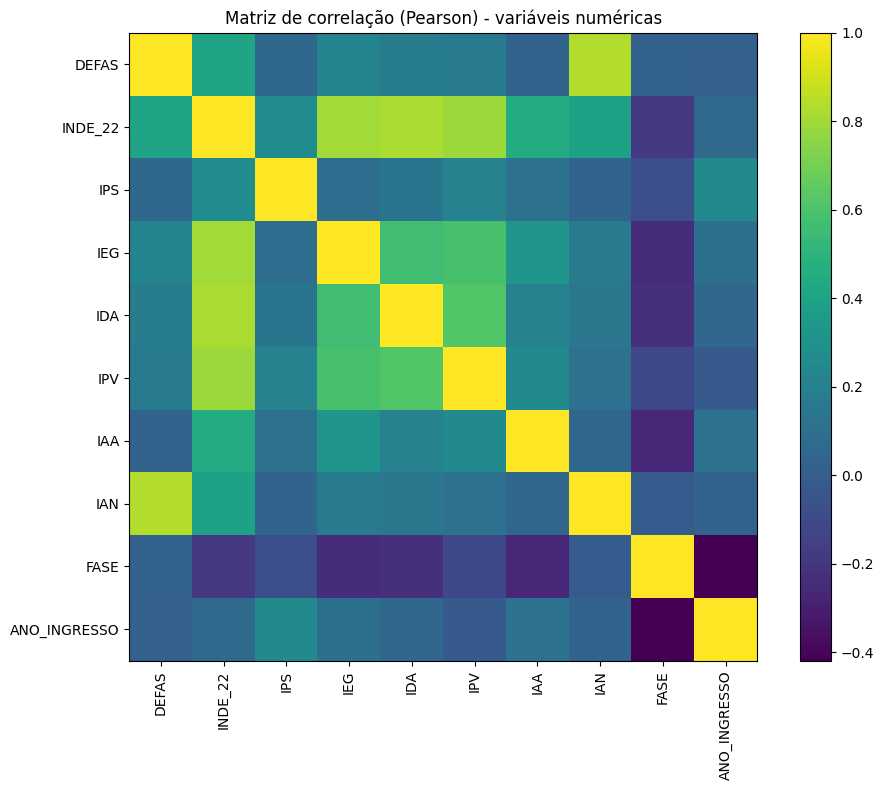

In [9]:
# Correlação entre variáveis numéricas (heatmap simples usando imshow)
num_df = df.select_dtypes(include=[np.number])
if num_df.shape[1] > 1:
    corr = num_df.corr()
    display(corr)
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    ticks = range(len(corr.columns))
    plt.xticks(ticks, corr.columns, rotation=90)
    plt.yticks(ticks, corr.columns)
    plt.title('Matriz de correlação (Pearson) - variáveis numéricas')
    plt.tight_layout()
else:
    print('Não há variáveis numéricas suficientes para calcular correlação.')


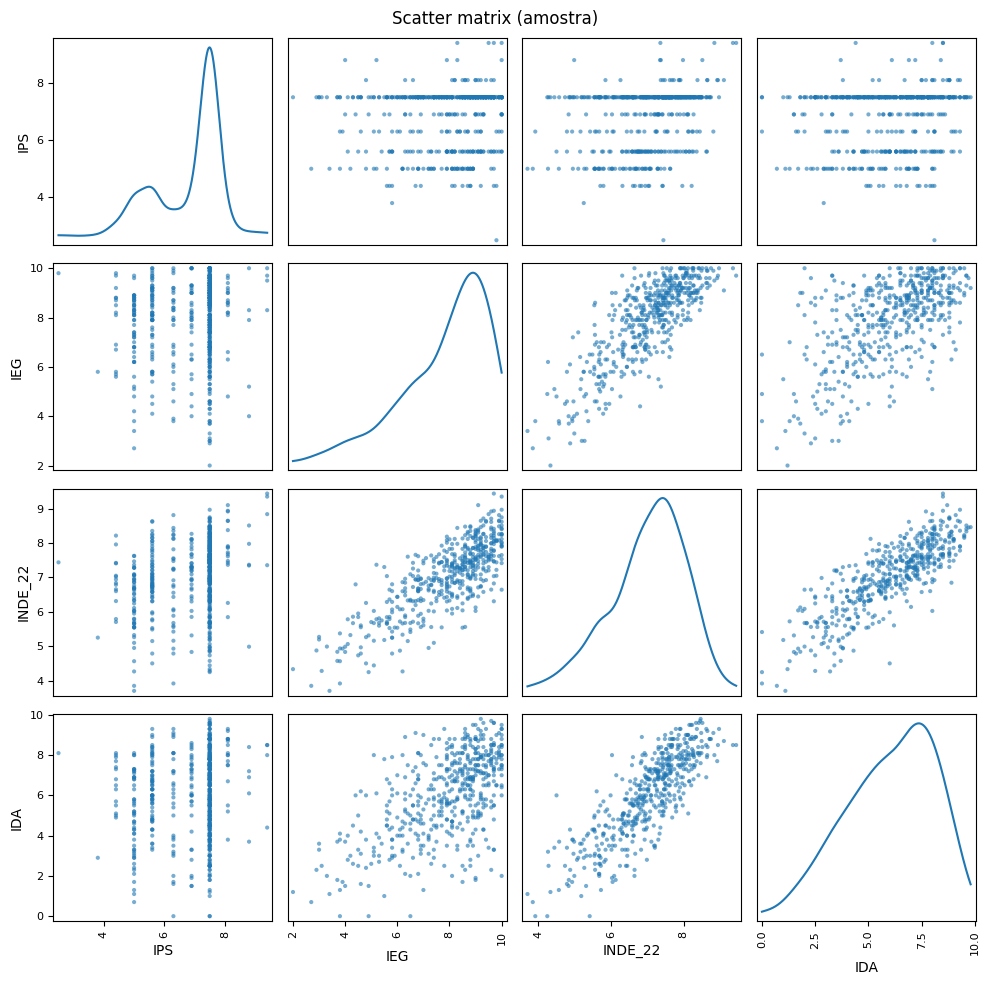

In [10]:
# Scatter matrix para um subconjunto de colunas (amostra para performance)
cols_for_scatter = numeric_cols[:4]
if 'num_df' in globals():
    cols_for_scatter = [c for c in cols_for_scatter if c in num_df.columns]
else:
    cols_for_scatter = [c for c in cols_for_scatter if c in df.columns]

if len(cols_for_scatter) >= 2:
    sample = df[cols_for_scatter].sample(n=min(500, len(df)), random_state=42)
    scatter_matrix(sample, alpha=0.6, figsize=(10, 10), diagonal='kde')
    plt.suptitle('Scatter matrix (amostra)')
    plt.tight_layout()
else:
    print('Não há colunas suficientes para scatter matrix.')


In [11]:
# Estatísticas agrupadas por colunas categóricas (ex.: FASE, BOLSISTA)
categorical_cols = ['FASE', 'PEDRA_22']
categorical_cols = [c for c in categorical_cols if c in df.columns]

if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    for cat in categorical_cols:
        display(df.groupby(cat)[numeric_cols].agg(['count','mean','std']).T)
else:
    print('Atualize categorical_cols ou verifique se as colunas existem no DataFrame.')


FASE                    0           1           2           3          4  \
IPS     count  190.000000  192.000000  155.000000  148.000000  76.000000   
        mean     7.005789    7.084375    6.821290    6.722297   6.614474   
        std      1.058310    0.869835    1.063441    1.095061   1.202853   
IEG     count  190.000000  192.000000  155.000000  148.000000  76.000000   
        mean     8.088947    8.522396    8.165806    7.068243   7.660526   
        std      1.357025    1.338190    1.388189    1.808522   1.691790   
INDE_22 count  190.000000  192.000000  155.000000  148.000000  76.000000   
        mean     7.365553    7.199828    6.958929    6.599865   7.005276   
        std      0.773207    0.872655    0.881080    1.236649   1.044323   
IDA     count  190.000000  192.000000  155.000000  148.000000  76.000000   
        mean     7.140000    6.464062    5.406452    5.141892   6.052632   
        std      1.675084    2.062304    1.997878    1.929119   1.547340   
IPV     count  190.000000  192.000000  155.000000  148.000000  76.000000   
        mean     7.557916    7.360833    7.339781    6.548595   7.206158   
        std      0.833924    0.939091    0.867227    1.315049   1.124776   

FASE                   5          6          7  
IPS     count  60.000000  18.000000  21.000000  
        mean    6.863333   7.961111   6.523810  
        std     1.186501   1.175304   0.982296  
IEG     count  60.000000  18.000000  21.000000  
        mean    7.343333   7.027778   7.242857  
        std     1.925156   1.874223   2.289666  
INDE_22 count  60.000000  18.000000  21.000000  
        mean    6.875283   7.201167   6.635048  
        std     1.266085   1.334734   0.999938  
IDA     count  60.000000  18.000000  21.000000  
        mean    5.873333   6.694444   5.252381  
        std     2.293016   1.556192   2.181884  
IPV     count  60.000000  18.000000  21.000000  
        mean    7.260667   8.215944   7.180714  
        std     1.268532   1.550092   0.862114

PEDRA_22         Ametista     Quartzo     Topázio       Ágata
IPS     count  348.000000  132.000000  130.000000  250.000000
        mean     7.069540    6.552273    7.345385    6.633200
        std      0.980703    1.169032    0.942626    1.075194
IEG     count  348.000000  132.000000  130.000000  250.000000
        mean     8.618966    5.259091    9.283846    7.543600
        std      0.887237    1.473841    0.557653    1.145473
INDE_22 count  348.000000  132.000000  130.000000  250.000000
        mean     7.528437    5.242909    8.366546    6.606000
        std      0.275772    0.604333    0.276883    0.287082
IDA     count  348.000000  132.000000  130.000000  250.000000
        mean     7.011207    3.141667    8.248462    5.252000
        std      1.205901    1.466108    0.889319    1.394804
IPV     count  348.000000  132.000000  130.000000  250.000000
        mean     7.629713    5.804394    8.425462    6.886008
        std      0.644565    1.088839    0.708135    0.705684